# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier


# Importing The Dataset

In [2]:
df=pd.read_csv('Downloads/train1.csv')

In [3]:
df.sample(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
13789,11-01-2016,2055,32,Male,C10,College,42260,01-02-2016,NaN,3,3,300710,2,0
1953,02-01-2016,308,30,Male,C5,Master,188418,8/15/2011,NaN,2,5,3225570,3,0
10811,04-01-2017,1612,34,Male,C27,College,69697,10/14/2015,NaN,2,2,625160,3,0
15966,11-01-2016,2371,42,Female,C29,Bachelor,35133,1/28/2013,NaN,1,2,493930,3,0
5654,12-01-2016,842,36,Male,C18,Bachelor,121419,7/26/2012,NaN,1,4,1083920,3,0
1583,07-01-2017,234,26,Female,C23,Bachelor,52616,01-02-2017,NaN,2,2,205110,1,0
15500,05-01-2017,2287,34,Female,C28,Master,57624,8/15/2016,NaN,2,2,259020,2,0
1196,05-01-2016,177,30,Male,C4,Bachelor,43053,12/14/2015,NaN,1,1,0,1,0
8933,10-01-2017,1319,40,Female,C5,Master,25178,1/19/2017,10/23/2017,1,1,0,1,1
548,01-01-2017,78,36,Male,C21,College,105946,9/16/2015,NaN,2,4,1572750,3,0


### Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  Target                19104 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.0+ MB


### We can observe that variables "MMM-YY","Dateofjoining","LastWorkDate" are in object dtype

### converting the object dtype into datetime

In [5]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  object        
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Target          

In [7]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Target          

In [9]:
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Target          

In [11]:
df.shape

(19104, 14)

In [12]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,0.084590
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,0.278277
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,0.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,0.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,1.000000


In [13]:
df['Emp_ID'].value_counts()

2049    24
2134    24
1271    24
1191    24
1111    24
        ..
1227     1
1358     1
2321     1
1195     1
2088     1
Name: Emp_ID, Length: 2381, dtype: int64

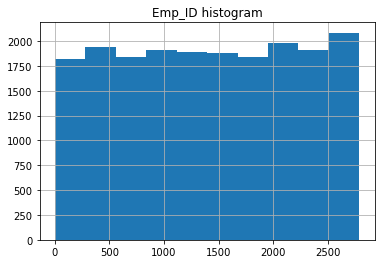

In [14]:
df['Emp_ID'].hist()
plt.title('Emp_ID histogram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


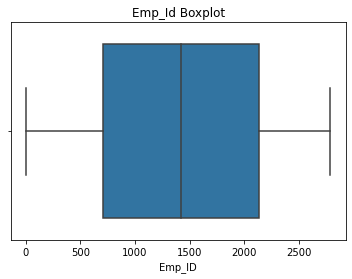

In [15]:
sns.boxplot(df['Emp_ID'])
plt.title('Emp_Id Boxplot')
plt.show()

In [16]:
df['Age'].value_counts()

36    1283
33    1250
34    1234
32    1150
30    1146
35    1138
31    1090
29    1013
37     862
38     854
39     788
28     772
27     752
40     706
41     661
26     583
42     478
25     449
44     407
43     399
45     371
46     350
24     277
47     224
23     193
48     144
49      99
22      92
52      78
51      72
50      69
21      41
53      26
54      25
55      21
58       7
Name: Age, dtype: int64

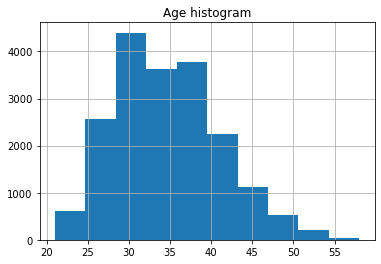

In [17]:
df['Age'].hist()
plt.title('Age histogram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


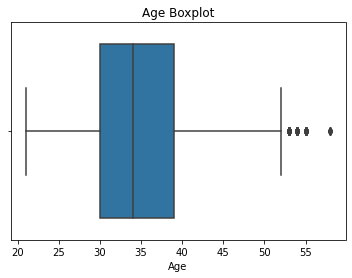

In [18]:
sns.boxplot(df['Age'])
plt.title('Age Boxplot')
plt.show()

In [19]:
iqr=df['Age'].quantile(0.75)-df['Age'].quantile(.25)
print('IQR:',iqr)
ul=df['Age'].quantile(.75)+1.5*iqr
print('UL:',ul)
ll=df['Age'].quantile(.25)-1.5*iqr
print('LL:',ll)

IQR: 9.0
UL: 52.5
LL: 16.5


In [20]:
low_lim_len=len(df['Age'][df['Age']<ll])
print('No of outliers:',low_lim_len)

LowerLimit_perc=low_lim_len/len(df)
print('Lower Limit Percentage :',LowerLimit_perc)


Upper_lim_len=len(df['Age'][df['Age']>ul])
print('no of outliers:',Upper_lim_len)

UpperLimit_perc=Upper_lim_len/len(df)
print('Upper Limit Percentage :',UpperLimit_perc)

No of outliers: 0
Lower Limit Percentage : 0.0
no of outliers: 79
Upper Limit Percentage : 0.004135259631490787


In [21]:
df['Gender'].value_counts()

Male      11103
Female     8001
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


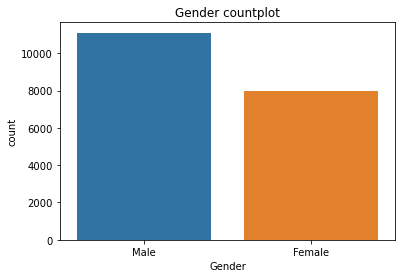

In [22]:
sns.countplot(df['Gender'])
plt.title('Gender countplot')
plt.show()

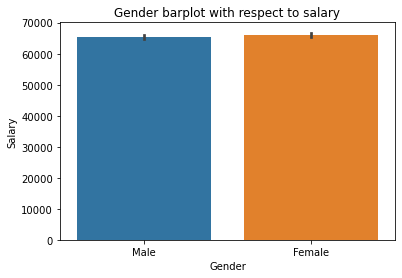

In [23]:
sns.barplot(x=df.Gender,y=df.Salary)
plt.title('Gender barplot with respect to salary')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


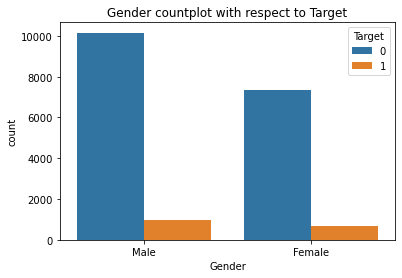

In [24]:
sns.countplot(df['Gender'],hue=df['Target'])
plt.title('Gender countplot with respect to Target')
plt.show()

In [25]:
df['City'].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


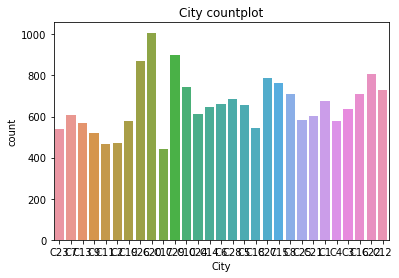

In [26]:
sns.countplot(df['City'])
plt.title('City countplot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


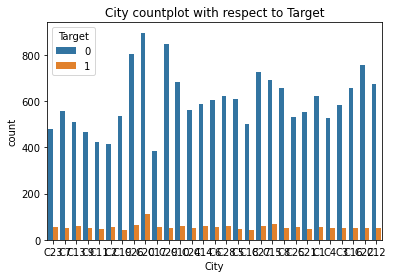

In [27]:
sns.countplot(df['City'],hue=df['Target'])
plt.title('City countplot with respect to Target')
plt.show()

In [28]:
df['Education_Level'].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


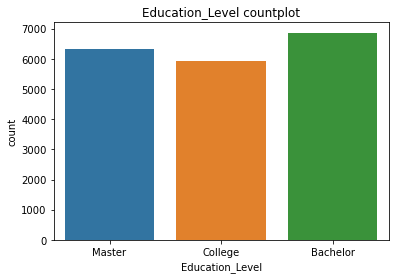

In [29]:
sns.countplot(df['Education_Level'])
plt.title('Education_Level countplot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


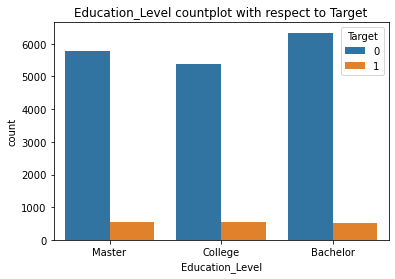

In [30]:
sns.countplot(df['Education_Level'],hue=df['Target'])
plt.title('Education_Level countplot with respect to Target')
plt.show()

In [31]:
df.groupby('Target')['Education_Level'].describe()

,count,unique,top,freq
Target,,,,
0,17488,3,Bachelor,6337
1,1616,3,Master,547


In [32]:
df.Salary.value_counts()

48747     57
109652    32
68356     30
42260     28
67490     28
          ..
59653      1
19235      1
17186      1
49659      1
57356      1
Name: Salary, Length: 2383, dtype: int64

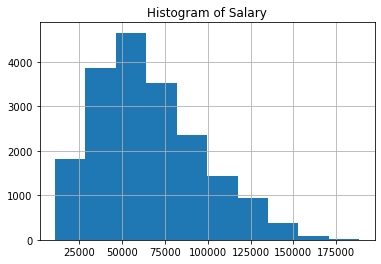

In [33]:
df.Salary.hist()
plt.title('Histogram of Salary')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


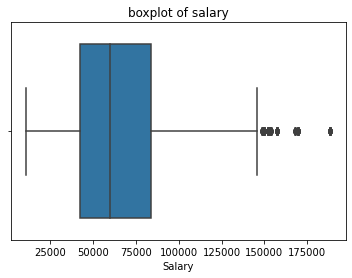

In [34]:
sns.boxplot(df.Salary)
plt.title('boxplot of salary')
plt.show()

In [35]:
iqr=df['Salary'].quantile(0.75)-df['Salary'].quantile(.25)
print('IQR:',iqr)
ul=df['Salary'].quantile(.75)+1.5*iqr
print('UL:',ul)
ll=df['Salary'].quantile(.25)-1.5*iqr
print('LL:',ll)

IQR: 41586.0
UL: 146348.0
LL: -19996.0


In [36]:
low_lim_len=len(df['Salary'][df['Salary']<ll])
print('No of outliers:',low_lim_len)

LowerLimit_perc=low_lim_len/len(df)
print('Lower Limit Percentage :',LowerLimit_perc)


Upper_lim_len=len(df['Salary'][df['Salary']>ul])
print('no of outliers:',Upper_lim_len)

UpperLimit_perc=Upper_lim_len/len(df)
print('Upper Limit Percentage :',UpperLimit_perc)

No of outliers: 0
Lower Limit Percentage : 0.0
no of outliers: 188
Upper Limit Percentage : 0.009840871021775544


<AxesSubplot:xlabel='City', ylabel='Salary'>

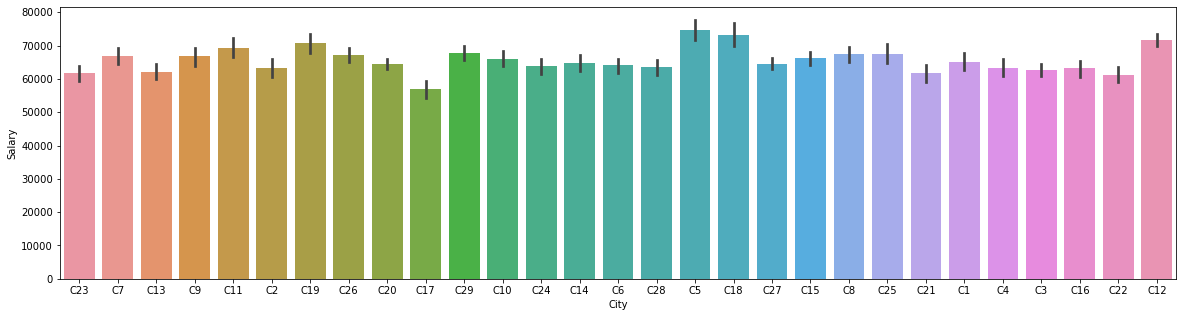

In [37]:
plt.figure(figsize=(20,5))
sns.barplot(x=df.City,y=df.Salary)

In [38]:
df['Joining Designation'].value_counts() 

1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


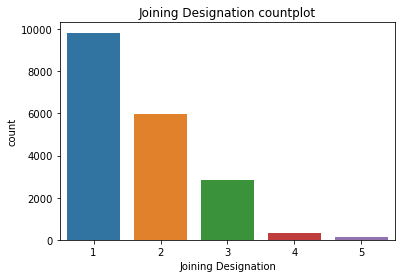

In [39]:
sns.countplot(df['Joining Designation'])
plt.title('Joining Designation countplot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


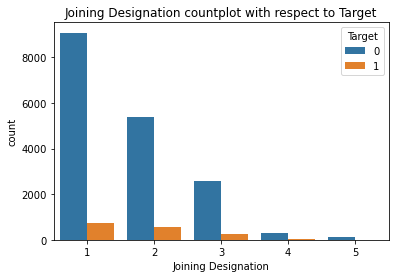

In [40]:
sns.countplot(df['Joining Designation'],hue=df['Target'])
plt.title('Joining Designation countplot with respect to Target')
plt.show()

In [41]:
df.Designation.value_counts()

2    6627
1    5202
3    4826
4    2144
5     305
Name: Designation, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


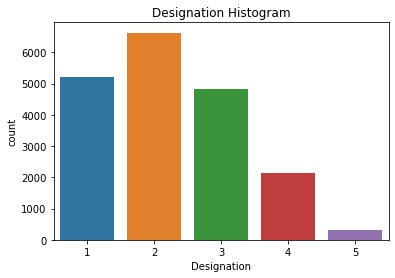

In [42]:
sns.countplot(df.Designation)
plt.title('Designation Histogram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


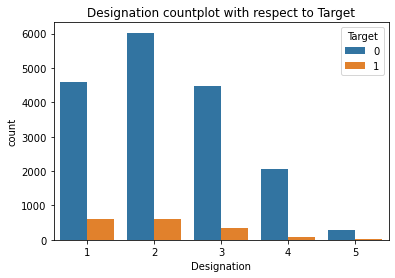

In [43]:
sns.countplot(df['Designation'],hue=df['Target'])
plt.title('Designation countplot with respect to Target')
plt.show()

In [44]:
df['Total Business Value'].value_counts()

0          6499
200000      288
250000      148
500000      131
300000      107
           ... 
515070        1
2178050       1
920580        1
1244170       1
400140        1
Name: Total Business Value, Length: 10181, dtype: int64

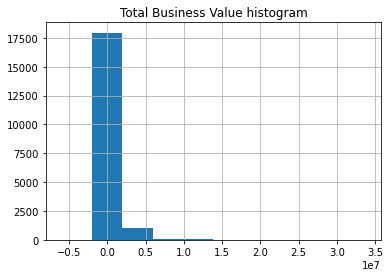

In [45]:
df['Total Business Value'].hist()
plt.title('Total Business Value histogram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


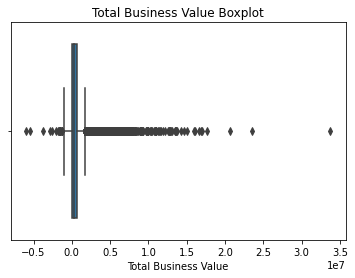

In [46]:
sns.boxplot(df['Total Business Value'])
plt.title('Total Business Value Boxplot')
plt.show()

In [47]:
iqr=df['Total Business Value'].quantile(0.75)-df['Total Business Value'].quantile(.25)
print('IQR:',iqr)
ul=df['Total Business Value'].quantile(.75)+1.5*iqr
print('UL:',ul)
ll=df['Total Business Value'].quantile(.25)-1.5*iqr
print('LL:',ll)

IQR: 699700.0
UL: 1749250.0
LL: -1049550.0


In [48]:
low_lim_len=len(df['Total Business Value'][df['Total Business Value']<ll])
print('No of outliers:',low_lim_len)

LowerLimit_perc=low_lim_len/len(df)
print('Lower Limit Percentage :',LowerLimit_perc)


Upper_lim_len=len(df['Total Business Value'][df['Total Business Value']>ul])
print('no of outliers:',Upper_lim_len)

UpperLimit_perc=Upper_lim_len/len(df)
print('Upper Limit Percentage :',UpperLimit_perc)

No of outliers: 16
Lower Limit Percentage : 0.0008375209380234506
no of outliers: 1355
Upper Limit Percentage : 0.07092755443886097


In [49]:
df['Quarterly Rating'].value_counts()

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


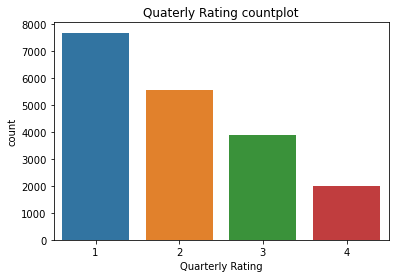

In [50]:
sns.countplot(df['Quarterly Rating'])
plt.title('Quaterly Rating countplot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


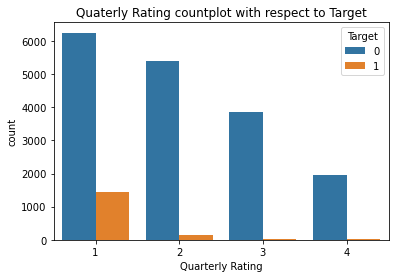

In [51]:
sns.countplot(df['Quarterly Rating'],hue=df['Target'])
plt.title('Quaterly Rating countplot with respect to Target')
plt.show()

### There are repeating emp_id's for same employees. This is due to change in salary and rating for every business value made by respect to employee so we can create a dataframe by grouping emp_id with all other columns with total business value   

In [52]:
Emp_id_grouping=df.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)
Emp_id_grouping.reset_index(drop=True,inplace=True)

<ipython-input-52-1bd4b29caa09>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Emp_id_grouping=df.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',


In [53]:
Total_business_df=df.groupby('Emp_ID').agg({'Total Business Value':'sum'})
Total_business_df.reset_index(drop=True,inplace=True)

In [54]:
df=pd.concat([Emp_id_grouping,Total_business_df],axis=1,ignore_index=False)

### Label Encoding 

In [55]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['City']=le.fit_transform(df['City'])
df['Education_Level']=le.fit_transform(df['Education_Level'])

In [56]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,1,15,2,57387,1,1,2,1,1715580
1,2,31,1,26,2,67016,2,2,1,0,0
2,4,43,1,4,2,65603,2,2,1,1,350000
3,5,29,1,28,1,46368,1,1,1,1,120360
4,6,31,0,2,0,78728,3,3,2,0,1265000


In [57]:
numerical=df.drop(['Emp_ID','Gender','Education_Level','Joining Designation','Designation','Quarterly Rating','Target'],axis=1)

In [58]:
numerical.head()

,Age,City,Salary,Total Business Value
0,28,15,57387,1715580
1,31,26,67016,0
2,43,4,65603,350000
3,29,28,46368,120360
4,31,2,78728,1265000


In [59]:
categorical=df.drop(['Age','City','Salary','Total Business Value'],axis=1)
categorical

,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,1,1,2,1,1,2,1
1,2,1,2,2,2,1,0
2,4,1,2,2,2,1,1
3,5,1,1,1,1,1,1
4,6,0,0,3,3,2,0
...,...,...,...,...,...,...,...
2376,2784,1,1,2,3,4,0
2377,2785,0,1,1,1,1,1
2378,2786,1,1,2,2,1,1
2379,2787,0,2,1,1,1,1


### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stc=StandardScaler()
minmax=MinMaxScaler()

In [61]:
scaled=stc.fit_transform(numerical)
scaled

array([[-0.94668243,  0.1121955 , -0.06861573, -0.31464103],
       [-0.44518787,  1.44545878,  0.27069993, -0.50264571],
       [ 1.56079034, -1.22106779,  0.22090732, -0.46429038],
       ...,
       [ 1.89512005, -0.49383327, -0.84447128, -0.1941494 ],
       [-0.94668243, -0.25142176,  0.35816296, -0.39548858],
       [-0.61235272,  0.59701851,  0.38480359, -0.25078927]])

In [62]:
scaled=pd.DataFrame(scaled,columns=['Age','City','Salary','Total Business Value'])
scaled

,Age,City,Salary,Total Business Value
0,-0.946682,0.112195,-0.068616,-0.314641
1,-0.445188,1.445459,0.270700,-0.502646
2,1.560790,-1.221068,0.220907,-0.464290
3,-0.779518,1.687870,-0.456914,-0.489456
4,-0.445188,-1.463479,0.683418,-0.364019
...,...,...,...,...
2376,0.056307,0.233401,0.827440,1.880735
2377,0.056307,1.687870,-1.664305,-0.502646
2378,1.895120,-0.493833,-0.844471,-0.194149
2379,-0.946682,-0.251422,0.358163,-0.395489


In [63]:
df2=pd.concat([scaled,categorical],axis=1)
df2

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,-0.946682,0.112195,-0.068616,-0.314641,1,1,2,1,1,2,1
1,-0.445188,1.445459,0.270700,-0.502646,2,1,2,2,2,1,0
2,1.560790,-1.221068,0.220907,-0.464290,4,1,2,2,2,1,1
3,-0.779518,1.687870,-0.456914,-0.489456,5,1,1,1,1,1,1
4,-0.445188,-1.463479,0.683418,-0.364019,6,0,0,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,0.056307,0.233401,0.827440,1.880735,2784,1,1,2,3,4,0
2377,0.056307,1.687870,-1.664305,-0.502646,2785,0,1,1,1,1,1
2378,1.895120,-0.493833,-0.844471,-0.194149,2786,1,1,2,2,1,1
2379,-0.946682,-0.251422,0.358163,-0.395489,2787,0,2,1,1,1,1


In [64]:
df.shape

(2381, 11)

### Smote

In [65]:
df.Target.value_counts()

1    1616
0     765
Name: Target, dtype: int64

In [66]:
not_default = df2[df2.Target==0] 

In [67]:
len(not_default)

765

In [68]:
default = df2[df2.Target==1] 

In [69]:
len(default)

1616

In [70]:
from sklearn.utils import resample
default_upsampled1 = resample(default,
                          replace=True, 
                          n_samples=len(not_default), 
                          random_state=27) 
default_upsampled1

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
1562,-0.946682,1.445459,-1.312268,-0.491470,1838,0,2,1,1,1,1
823,1.393625,-0.251422,0.534992,-0.099789,965,1,2,1,2,1,1
1141,0.390636,0.475813,0.566742,0.389104,1343,0,0,2,3,1,1
1951,-0.445188,-0.251422,-0.654533,-0.480492,2288,1,1,1,1,1,1
1570,0.892131,0.960636,-0.628316,-0.502646,1846,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.946682,0.233401,-0.099943,-0.502646,1207,1,1,2,2,1,1
1702,0.223472,1.324253,1.391474,2.178054,2002,1,0,2,4,1,1
309,-1.113847,-1.221068,-0.831891,-0.452656,364,1,2,1,1,1,1
1111,0.390636,0.839430,-0.046063,-0.502646,1308,1,1,3,3,1,1


In [71]:
upsampled = pd.concat([not_default, default_upsampled1]) 
upsampled

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
1,-0.445188,1.445459,0.270700,-0.502646,2,1,2,2,2,1,0
4,-0.445188,-1.463479,0.683418,-0.364019,6,0,0,3,3,2,0
6,-0.946682,-0.493833,-0.604776,-0.502646,11,0,2,1,1,1,0
9,0.892131,0.475813,-1.395467,-0.502646,14,0,1,3,3,1,0
17,-0.445188,0.233401,1.506212,3.480951,25,1,0,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.946682,0.233401,-0.099943,-0.502646,1207,1,1,2,2,1,1
1702,0.223472,1.324253,1.391474,2.178054,2002,1,0,2,4,1,1
309,-1.113847,-1.221068,-0.831891,-0.452656,364,1,2,1,1,1,1
1111,0.390636,0.839430,-0.046063,-0.502646,1308,1,1,3,3,1,1


In [72]:
upsampled.head()

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
1,-0.445188,1.445459,0.270700,-0.502646,2,1,2,2,2,1,0
4,-0.445188,-1.463479,0.683418,-0.364019,6,0,0,3,3,2,0
6,-0.946682,-0.493833,-0.604776,-0.502646,11,0,2,1,1,1,0
9,0.892131,0.475813,-1.395467,-0.502646,14,0,1,3,3,1,0
17,-0.445188,0.233401,1.506212,3.480951,25,1,0,1,3,4,0


In [73]:
upsampled.Target.value_counts()

0    765
1    765
Name: Target, dtype: int64

# without scaling


In [74]:
df1=upsampled.copy()

### Splitting the data

In [75]:
x=df1.drop(['Target','Emp_ID'],axis=1)
y=df1[['Target']]

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=123)

In [77]:
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape)
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain: (1147, 9)
xtest: (383, 9)
ytrain: (1147, 1)
ytest: (383, 1)


## Support Vector Machine

In [78]:
from sklearn import svm
from sklearn.svm import SVC

In [79]:
model1=SVC(kernel='linear')

In [80]:
model1.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [81]:
y_pred1=model1.predict(xtest)

In [82]:
print(accuracy_score(ytest,y_pred1))

0.7310704960835509


In [83]:
test=pd.read_csv('Downloads/test1.csv')

In [84]:
test.sample(10)

,Emp_ID
269,2258
144,568
204,272
685,1880
497,902
140,26
566,462
12,1031
666,2030
350,501


In [85]:
test.shape

(741, 1)

In [86]:
s=pd.merge(test,df1, on='Emp_ID')

In [87]:
s

,Emp_ID,Age,City,Salary,Total Business Value,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,394,0.056307,-0.251422,1.352747,2.506409,0,2,2,4,3,0
1,173,0.892131,0.718224,-0.111361,1.674435,1,1,1,3,3,0
2,1090,0.892131,-1.221068,1.318494,5.018603,1,1,2,4,2,0
3,840,1.059296,1.566665,1.038803,1.375016,0,1,1,4,2,0
4,308,-0.278023,1.203047,4.548777,5.856064,1,2,2,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...
736,2134,1.059296,0.839430,1.997055,6.039289,1,1,2,5,1,0
737,2255,1.059296,0.354607,2.613137,3.486099,1,1,3,4,3,0
738,448,0.557801,-1.584685,0.213366,2.819888,1,0,2,4,3,0
739,1644,2.396615,1.687870,1.627293,2.658136,0,0,2,4,1,0


In [88]:
s.shape

(741, 11)

In [89]:
s=s.drop(['Emp_ID','Target'],axis=1)

In [90]:
s.head()

,Age,City,Salary,Total Business Value,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating
0,0.056307,-0.251422,1.352747,2.506409,0,2,2,4,3
1,0.892131,0.718224,-0.111361,1.674435,1,1,1,3,3
2,0.892131,-1.221068,1.318494,5.018603,1,1,2,4,2
3,1.059296,1.566665,1.038803,1.375016,0,1,1,4,2
4,-0.278023,1.203047,4.548777,5.856064,1,2,2,5,2


In [91]:
test_pred=model1.predict(s)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [92]:
submission=pd.read_csv('Downloads/submission.csv')

In [93]:
submission.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [94]:
submission['Target']=test_pred

In [95]:
submission

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,1
737,2255,0
738,448,0
739,1644,1


### Logistic Regression

In [96]:
lr=LogisticRegression()
lrmodel=lr.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [97]:
Logistic_pred=lrmodel.predict(xtest)
Logistic_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [98]:
confusion_matrix(ytest,Logistic_pred)

array([[120,  67],
       [ 29, 167]], dtype=int64)

In [99]:
print(classification_report(ytest,Logistic_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       187
           1       0.71      0.85      0.78       196

    accuracy                           0.75       383
   macro avg       0.76      0.75      0.75       383
weighted avg       0.76      0.75      0.75       383



### Decision Tree

In [100]:
dtc=DecisionTreeClassifier()
dtcmodel=dtc.fit(xtrain,ytrain)

In [101]:
dtc_pred=dtcmodel.predict(xtest)
dtc_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [102]:
confusion_matrix(ytest,dtc_pred)

array([[126,  61],
       [ 45, 151]], dtype=int64)

In [103]:
print(classification_report(ytest,dtc_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       187
           1       0.71      0.77      0.74       196

    accuracy                           0.72       383
   macro avg       0.72      0.72      0.72       383
weighted avg       0.72      0.72      0.72       383



### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
model_rfc=RandomForestClassifier(n_estimators=1000)

In [106]:
model_rfc.fit(xtrain,ytrain)

<ipython-input-106-4faf739bcfd8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=1000)

In [107]:
rfc_pred=dtcmodel.predict(xtest)
rfc_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [108]:
confusion_matrix(ytest,rfc_pred)

array([[126,  61],
       [ 45, 151]], dtype=int64)

In [109]:
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       187
           1       0.71      0.77      0.74       196

    accuracy                           0.72       383
   macro avg       0.72      0.72      0.72       383
weighted avg       0.72      0.72      0.72       383



### Ada Booster

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [112]:
model = abc.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [113]:
y_pred = model.predict(xtest)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

In [114]:
confusion_matrix(ytest,y_pred)

array([[129,  58],
       [ 40, 156]], dtype=int64)

In [115]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       187
           1       0.73      0.80      0.76       196

    accuracy                           0.74       383
   macro avg       0.75      0.74      0.74       383
weighted avg       0.75      0.74      0.74       383



## with scaling

### Splitting the data

In [116]:
x1=df2.drop(['Target','Emp_ID',],axis=1)
y1=df2[['Target']]

In [117]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=123)

### Naive Baye's

In [118]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [119]:
nv_pred  =  classifier.predict(xtest)

In [120]:
nv_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [121]:
confusion_matrix(ytest,nv_pred)

array([[118, 117],
       [ 43, 437]], dtype=int64)

### Logistic Regression 

In [122]:
lr=LogisticRegression()
lrmodel=lr.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [123]:
Logistic_pred=lrmodel.predict(xtest)
Logistic_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [124]:
confusion_matrix(ytest,Logistic_pred)

array([[123, 112],
       [ 24, 456]], dtype=int64)

In [125]:
print(classification_report(ytest,Logistic_pred))

              precision    recall  f1-score   support

           0       0.84      0.52      0.64       235
           1       0.80      0.95      0.87       480

    accuracy                           0.81       715
   macro avg       0.82      0.74      0.76       715
weighted avg       0.81      0.81      0.80       715



In [126]:
test_pred=lrmodel.predict(s)

In [127]:
submission['Target']=test_pred

In [128]:
submission.to_csv('submission23.csv',index=False)

## Decision tree

In [129]:
dtc=DecisionTreeClassifier()
dtcmodel=dtc.fit(xtrain,ytrain)

In [130]:
dtc_pred=dtcmodel.predict(xtest)
dtc_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [131]:
confusion_matrix(ytest,dtc_pred)

array([[130, 105],
       [103, 377]], dtype=int64)

In [132]:
print(classification_report(ytest,dtc_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       235
           1       0.78      0.79      0.78       480

    accuracy                           0.71       715
   macro avg       0.67      0.67      0.67       715
weighted avg       0.71      0.71      0.71       715



## Random Forest

In [133]:
model_rfc=RandomForestClassifier(n_estimators=1000)

In [134]:
model_rfc.fit(xtrain,ytrain)

<ipython-input-134-4faf739bcfd8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=1000)

In [135]:
rfc_pred=model_rfc.predict(xtest)
rfc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [136]:
confusion_matrix(ytest,rfc_pred)

array([[141,  94],
       [ 46, 434]], dtype=int64)

In [137]:
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       235
           1       0.82      0.90      0.86       480

    accuracy                           0.80       715
   macro avg       0.79      0.75      0.76       715
weighted avg       0.80      0.80      0.80       715



In [138]:
test_pred=model_rfc.predict(s)

In [139]:
submission['Target']=test_pred

In [140]:
submission.to_csv('rfc1.csv',index=False)

In [141]:
s=pd.merge(test,df2, on='Emp_ID')

In [142]:
s.head()

,Emp_ID,Age,City,Salary,Total Business Value,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,394,0.056307,-0.251422,1.352747,2.506409,0,2,2,4,3,0
1,173,0.892131,0.718224,-0.111361,1.674435,1,1,1,3,3,0
2,1090,0.892131,-1.221068,1.318494,5.018603,1,1,2,4,2,0
3,840,1.059296,1.566665,1.038803,1.375016,0,1,1,4,2,0
4,308,-0.278023,1.203047,4.548777,5.856064,1,2,2,5,2,0


In [143]:
s.drop(['Emp_ID','Target'],axis=1,inplace=True)

In [144]:
test_pred=lrmodel.predict(s)
test_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [145]:
submission['Target']=test_pred

In [146]:
from sklearn.preprocessing import scale

In [147]:
numerical.head()

,Age,City,Salary,Total Business Value
0,28,15,57387,1715580
1,31,26,67016,0
2,43,4,65603,350000
3,29,28,46368,120360
4,31,2,78728,1265000


In [148]:
categorical.head()

,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,1,1,2,1,1,2,1
1,2,1,2,2,2,1,0
2,4,1,2,2,2,1,1
3,5,1,1,1,1,1,1
4,6,0,0,3,3,2,0


In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_ = pca.fit_transform(numerical)

In [150]:
numerical.shape

(2381, 4)

In [151]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99991722e-01 8.27829748e-06 8.17321576e-13]


### Support Vector Machine

In [152]:
from sklearn import svm
from sklearn.svm import SVC

In [153]:
svm=SVC(kernel='linear',C=1,gamma='auto')

In [154]:
svm.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, gamma='auto', kernel='linear')

In [155]:
svm_pred=svm.predict(xtest)

In [156]:
svm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [157]:
confusion_matrix(ytest,svm_pred)

array([[129, 106],
       [ 27, 453]], dtype=int64)

In [158]:
print(classification_report(ytest,svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66       235
           1       0.81      0.94      0.87       480

    accuracy                           0.81       715
   macro avg       0.82      0.75      0.77       715
weighted avg       0.82      0.81      0.80       715



In [159]:
test_pred=svm.predict(s)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [160]:
submission['Target']=test_pred

In [161]:
submission.to_csv('submission23.csv',index=False)

### Support Vector Machine with Hyper Parameter Tuning Using  Grid Search

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [164]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [165]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV 3/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [166]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [167]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1)


In [168]:

grid_predictions = grid.predict(xtest)

In [169]:
print(classification_report(ytest, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.59      0.69       235
           1       0.82      0.95      0.88       480

    accuracy                           0.83       715
   macro avg       0.84      0.77      0.79       715
weighted avg       0.83      0.83      0.82       715



# Prediction using SVM

### Support Vector Machine

In [170]:
model1=SVC(kernel='linear')

In [171]:
model1.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [172]:
y_pred1=model1.predict(xtest)

In [173]:
print(accuracy_score(ytest,y_pred1))

0.813986013986014


In [174]:
confusion_matrix(ytest,y_pred1)

array([[129, 106],
       [ 27, 453]], dtype=int64)

In [175]:
print(classification_report(ytest, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66       235
           1       0.81      0.94      0.87       480

    accuracy                           0.81       715
   macro avg       0.82      0.75      0.77       715
weighted avg       0.82      0.81      0.80       715



In [176]:
test_pred=model1.predict(s)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

### Submission

In [177]:
submission['Target']=test_pred

In [179]:
submission.to_csv('final.csv')